In [1]:
import numpy as np
import pandas as pd 
from scipy import stats
from tqdm import tqdm
import matplotlib.pyplot as plt 
import seaborn as sns  

import pickle

import warnings
warnings.filterwarnings("ignore")

from prettytable import PrettyTable

from sklearn.preprocessing import StandardScaler  # Standardizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # One hot Encoder
from scipy.sparse import csr_matrix  # For sparse matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier  # Logistic Regression
from sklearn.svm import LinearSVC  # SVM
from sklearn.tree import DecisionTreeClassifier  #DecisionTree
from sklearn.ensemble import RandomForestClassifier  # RandomForest
import xgboost as xgb  #XGB

from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer  # Scoring functions
from sklearn.metrics import auc, f1_score, roc_curve, roc_auc_score  # Scoring fns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  # Cross validation

%matplotlib inline

In [2]:
file_path = "./final-ipynb"

In [3]:
# Cargar datos de test y train
x_train, y_train = pickle.load(open(file_path+'/final_train.pkl', 'rb'))
x_test, y_test = pickle.load(open(file_path+'/final_test.pkl', 'rb'))

# Diccionarios
saved_dict = pickle.load(open(file_path+'/saved_dict.pkl', 'rb'))
mode_dict = pickle.load(open(file_path+'/mode_dict.pkl', 'rb'))

# Standard scaler
scaler = pickle.load(open(file_path+'/scaler.pkl', 'rb'))

# Encoders one-hot
ohe_proto = pickle.load(open(file_path+'/ohe_proto.pkl', 'rb'))
ohe_service = pickle.load(open(file_path+'/ohe_service.pkl', 'rb'))
ohe_state = pickle.load(open(file_path+'/ohe_state.pkl', 'rb'))

In [4]:
x_train.head()

,sttl,dttl,swin,trans_depth,res_bdy_len,stime,sintpkt,dintpkt,tcprtt,synack,...,state_INT,state_MAS,state_PAR,state_REQ,state_RST,state_TST,state_TXD,state_URH,state_URN,state_no
0,2.561444,-0.717760,-1.196045,-0.225343,-0.089113,-1.172764,-0.057567,-0.055099,-0.136439,-0.128893,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.037542,-0.717760,-1.196045,-0.225343,-0.089113,0.868469,-0.069616,-0.055099,-0.136439,-0.128893,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.426051,-0.041365,0.836096,-0.225343,-0.089113,-1.157401,-0.069485,-0.054857,-0.121383,-0.107394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.426051,-0.041365,0.836096,-0.225343,-0.089113,-1.136357,-0.063807,-0.044512,-0.120830,-0.107159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.426051,-0.041365,0.836096,-0.225343,-0.089113,-1.144197,-0.069180,-0.054358,-0.123351,-0.110421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Crear la matriz dispersa de train
x_train_csr = csr_matrix(x_train.values)

col = x_train.columns

x_train = pd.DataFrame.sparse.from_spmatrix(x_train_csr, columns=col)

In [6]:
pickle.dump((x_train, y_train), open(file_path+'/train_sparse.pkl', 'wb'))

x_train, y_train = pickle.load(open(file_path+'/train_sparse.pkl', 'rb'))

In [7]:
x_train.sparse.to_dense().head()

,sttl,dttl,swin,trans_depth,res_bdy_len,stime,sintpkt,dintpkt,tcprtt,synack,...,state_INT,state_MAS,state_PAR,state_REQ,state_RST,state_TST,state_TXD,state_URH,state_URN,state_no
0,2.561444,-0.717760,-1.196045,-0.225343,-0.089113,-1.172764,-0.057567,-0.055099,-0.136439,-0.128893,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.037542,-0.717760,-1.196045,-0.225343,-0.089113,0.868469,-0.069616,-0.055099,-0.136439,-0.128893,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.426051,-0.041365,0.836096,-0.225343,-0.089113,-1.157401,-0.069485,-0.054857,-0.121383,-0.107394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.426051,-0.041365,0.836096,-0.225343,-0.089113,-1.136357,-0.063807,-0.044512,-0.120830,-0.107159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.426051,-0.041365,0.836096,-0.225343,-0.089113,-1.144197,-0.069180,-0.054358,-0.123351,-0.110421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
x_train.shape, y_train.shape

((1778032, 196), (1778032,))

In [9]:
#Limpieza de datos

def clean_data(data):

    #Elimina los valores nulos y erróneos 
    
    numerical_col = data.select_dtypes(include=np.number).columns 
    categorical_col = data.select_dtypes(exclude=np.number).columns
    
    # Cleaning the data
    for col in data.columns:
        val = mode_dict[col]  # Sustituye los valores nulos por el valor modal
        data[col] = data[col].fillna(value=val)
        data[col] = data[col].replace(' ', value=val)
        data[col] = data[col].apply(lambda x:"None" if x=="-" else x)

        # Si son binarias y el valor es >1 se sustituye por el valor modal
        if col in saved_dict['binary_col']:
            data[col] = np.where(data[col]>1, val, data[col])

    # Convertir columnas de tipo erróneo
    bad_dtypes = list(set(categorical_col) - set(saved_dict['cat_col']))
    for bad_col in bad_dtypes:
        data[col] = data[col].astype(float)
    
    return data


#Aplicar log1p

def apply_log1p(data):
    
    #Ejecuta el log1p, crea una nueva columna y elimina la original
    
    for col in saved_dict['log1p_col']:
        new_col = col + '_log1p'
        data[new_col] = data[col].apply(np.log1p)
        data.drop(col, axis=1, inplace=True)
    return data

#Estandarizar los valores

def standardize(data):
    
    #Estandariza las columnas numéricas
    
    data[saved_dict['num_col']] = scaler.transform(data[saved_dict['num_col']])
    return data


#Encoders one-hot para las columnas categóricas

def ohencoding(data):
    '''
    Onehot encoding the categoricla columns.
    Add the ohe columns with the data and removes categorical columns.
    Using Onehotencoder objects trained on train data.
    '''
    X = ohe_service.transform(data['service'].values.reshape(-1, 1))
    Xm = ohe_proto.transform(data['proto'].values.reshape(-1, 1))
    Xmm = ohe_state.transform(data['state'].values.reshape(-1, 1))
    
    #Incluir las columnas con el encoder y eliminar las originales
    
    data = pd.concat([data,
                      pd.DataFrame(Xm.toarray(), columns=['proto_'+i for i in ohe_proto.categories_[0]]),
                      pd.DataFrame(X.toarray(), columns=['service_'+i for i in ohe_service.categories_[0]]),
                      pd.DataFrame(Xmm.toarray(), columns=['state_'+i for i in ohe_state.categories_[0]])],
                      axis=1)
    
    data.drop(['proto', 'service', 'state'], axis=1, inplace=True)
    return data

In [10]:
def get_final_data(data, saved_dict=saved_dict, mode_dict=mode_dict):
    
    # Convierte unos datos de entrada a los valores adecuados
    
    data.reset_index(drop=True, inplace=True)
    data.columns = saved_dict['columns']
    
    
    dropable_col = saved_dict['to_drop'] + saved_dict['corr_col']
    data.drop(columns=dropable_col, inplace=True)
    
    data = clean_data(data)
    data = apply_log1p(data)
    data = standardize(data)
    data = ohencoding(data)
    
    return data

In [11]:
# Convierte los datos test a los valores adecuados

x_test = get_final_data(x_test)

In [12]:
# Crear la matriz dispersa de test
x_test_csr = csr_matrix(x_test.values)

col = x_test.columns

x_test = pd.DataFrame.sparse.from_spmatrix(x_test_csr, columns=col)

In [13]:
x_train.shape, y_train.shape

((1778032, 196), (1778032,))

In [14]:
x_test.shape, y_test.shape

((762015, 196), (762015,))

In [15]:
all(x_train.columns == x_test.columns)

True

In [16]:
def false_alarm_rate(y_true, y_pred):
    
    # Calcula el false alarm rate
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    FPR = fp / (fp + tn)  # False positive rate
    FNR = fn / (fn + tp)  # False negetive rate
    return (FPR+FNR)/2  # False alarm rate

In [17]:
#Función para ajustar los hiperparámetros
    
def hyperparam_tuning(clf, parameters, x, y, method='gridsearch', cv=None):

    # Inicialización
    scoring = {'auc': 'roc_auc',
               'f1': 'f1',
               'FAR': make_scorer(false_alarm_rate, greater_is_better=False)}  # función de puntuación propia

    # Crear copias modificables de los datos de entrada 
    x_copy = x.copy()
    y_copy = y.copy()

    # Ajuste de los parámetros
    
    if method == 'gridsearch':
        tuning_clf = GridSearchCV(clf, parameters, scoring=scoring, refit='auc',
                                  cv=cv, verbose=3, return_train_score=True)
        result = tuning_clf.fit(x_copy, y_copy)

    elif method == 'randomsearch':
        tuning_clf = RandomizedSearchCV(clf, parameters, scoring=scoring, refit='auc',
                                        cv=cv, verbose=3, return_train_score=True)
        result = tuning_clf.fit(x_copy, y_copy)

    return result

In [18]:
#Función para mostrar los resultados del ajuste de hiperparámetros

def result_visualization(tuned_clf, parameters, param1=None, param2=None):
    
    train_score = tuned_clf.cv_results_['mean_train_auc']
    test_score = tuned_clf.cv_results_['mean_test_auc']

    print("Mejor puntuación: {}".format(tuned_clf.best_score_))
    print("Mejores parámetros: {}".format(tuned_clf.best_params_))

    # Visualizar putnuación con dos parámetros
    
    if param2 is not None:
        
        # Mapa de calor
        
        train_cmap=sns.light_palette("green")
        test_cmap=sns.light_palette("blue")
        
        fig = plt.figure(figsize=(20,5))
        train_ax = fig.add_subplot(1,2,1)
        test_ax = fig.add_subplot(1,2,2)
        
        # Mapa de calor de train
        
        sns.heatmap(train_score.reshape(len(parameters[param1]), len(parameters[param2])),
                    cmap=train_cmap, annot=True, fmt='.4f', ax=train_ax,
                    xticklabels=parameters[param2], yticklabels=parameters[param1])
        
        # Mapa de calor de test
        
        sns.heatmap(test_score.reshape(len(parameters[param1]), len(parameters[param2])),
                    cmap=test_cmap, annot=True, fmt='.6f', ax=test_ax,
                    xticklabels=parameters[param2], yticklabels=parameters[param1])
        
        # axis labels and plot title
        train_ax.set_title("Mapa de calor hiperparámetros train ")
        train_ax.set_xlabel(param2)
        train_ax.set_ylabel(param1)

        test_ax.set_title("Mapa de calor hiperparámetros test")
        test_ax.set_xlabel(param2)
        test_ax.set_ylabel(param1)
        plt.show()
    
    # Visualizar la puntuación con un solo parámetro
    
    else:
        plt.figure(figsize=(10,5))
        plt.plot(np.log10(parameters[param1]), train_score, label="train")
        plt.plot(np.log10(parameters[param1]), test_score, label="test")

        # Datos de train
        
        for i, txt in enumerate(train_score):
            plt.annotate((parameters[param1][i], np.round(txt, 3)), (np.log10(parameters[param1])[i], train_score[i]))
        
        # Datos de test
        
        for i, txt in enumerate(test_score):
            plt.annotate((parameters[param1][i], np.round(txt, 3)), (np.log10(parameters[param1])[i], test_score[i]))
        
        plt.xlabel(param1)
        plt.ylabel('Rendimiento')
        plt.grid()
        plt.legend()
        plt.show()

In [19]:
#Función para evaluar el rendimiento

def evaluate_result(clf, x_train, y_train, x_test, y_test, model_name):

    cmap=sns.light_palette("blue")
    labels= ['non-attack', 'attack']
    
    # Entrenamiento del mejor modelo
    
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    
    y_test = y_test.values
    
    #Calculo de métricas de evaluación
    
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
    
    # Para los datos train
    train_auc = auc(train_fpr, train_tpr)
    train_f1 = f1_score(y_train, y_train_pred)
    train_far = false_alarm_rate(y_train, y_train_pred)
    
    # Para los datos test
    test_auc = auc(test_fpr, test_tpr)
    test_f1 = f1_score(y_test, y_test_pred)
    test_far = false_alarm_rate(y_test, y_test_pred)
    
    # Presentar los resultados en una tabla
    
    x = PrettyTable()
    x.field_names = ['Dataset', 'Model', 'AUC', 'F1-score', 'False Alarm Rate']
    x.add_row(['Train', model_name, train_auc, train_f1, train_far])
    x.add_row(['Test', model_name, test_auc, test_f1, test_far])
    print(x)

    # Área sobre la curva ROC
    
    plt.figure()
    plt.plot(train_fpr, train_tpr, label=f"Train AUC: {train_auc}")
    plt.plot(test_fpr, test_tpr, label=f"Test AUC: {test_auc}")
    plt.grid()
    plt.legend()
    plt.show()

    # Matriz de confusión de train
    
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.heatmap(confusion_matrix(y_train, y_train_pred),
                annot=True, cmap=cmap, fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicción")
    plt.ylabel("Actual")
    plt.title("Matriz de confusión de train")

    # Matriz de confusión de test
    
    plt.subplot(1,2,2)
    sns.heatmap(confusion_matrix(y_test, y_test_pred),
                annot=True, cmap=cmap, fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicción")
    plt.ylabel("Actual")
    plt.title("Matriz de confusión de test")
    plt.show()
    
    return clf, test_auc, test_f1, test_far

##  Logistic Regression

In [20]:
# Configurar diferentes valores de alpha para un l2 y un clasificador LR

clf = SGDClassifier(loss='log_loss', penalty='l2')
param = {'alpha':np.logspace(-6, 1, 8)}  # Posibles valores de alpha

lr_clf = hyperparam_tuning(clf, param, x_train_csr, y_train, cv=3)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END alpha=1e-06; FAR: (train=-0.017, test=-0.018) auc: (train=0.999, test=0.999) f1: (train=0.959, test=0.958) total time=  18.7s
[CV 2/3] END alpha=1e-06; FAR: (train=-0.042, test=-0.042) auc: (train=0.998, test=0.998) f1: (train=0.945, test=0.945) total time=  13.7s
[CV 3/3] END alpha=1e-06; FAR: (train=-0.023, test=-0.022) auc: (train=0.999, test=0.999) f1: (train=0.955, test=0.956) total time=  17.2s
[CV 1/3] END alpha=1e-05; FAR: (train=-0.017, test=-0.017) auc: (train=0.999, test=0.999) f1: (train=0.959, test=0.957) total time=   6.0s
[CV 2/3] END alpha=1e-05; FAR: (train=-0.036, test=-0.037) auc: (train=0.999, test=0.999) f1: (train=0.951, test=0.951) total time=   5.5s
[CV 3/3] END alpha=1e-05; FAR: (train=-0.019, test=-0.019) auc: (train=0.999, test=0.999) f1: (train=0.957, test=0.959) total time=   5.6s
[CV 1/3] END alpha=0.0001; FAR: (train=-0.020, test=-0.020) auc: (train=0.999, test=0.999) f1: (train=0.95

Mejor puntuación: 0.9991688473792371
Mejores parámetros: {'alpha': 0.0001}


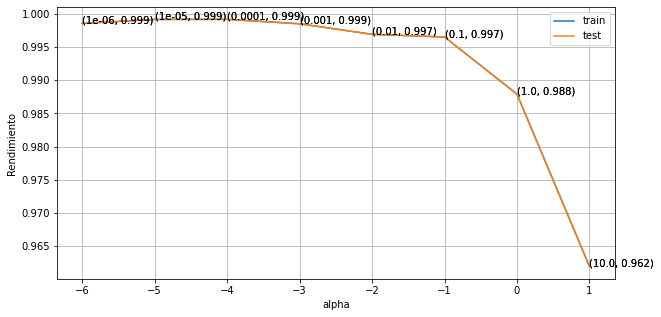

In [21]:
# Visualizar los resultados para cada valor de alpha

result_visualization(lr_clf, param, param1='alpha')

In [22]:
# Configurar diferentes valores de alpha para un l1 y un clasificador LR

clf = SGDClassifier(loss='log_loss', penalty='l1')
param = {'alpha':np.logspace(-6, 1, 8)}  # Posibles valores de alpha

lr_clf = hyperparam_tuning(clf, param, x_train_csr, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END alpha=1e-06; FAR: (train=-0.038, test=-0.039) auc: (train=0.999, test=0.999) f1: (train=0.951, test=0.950) total time=  23.0s
[CV 2/5] END alpha=1e-06; FAR: (train=-0.046, test=-0.048) auc: (train=0.999, test=0.999) f1: (train=0.943, test=0.942) total time=  20.9s
[CV 3/5] END alpha=1e-06; FAR: (train=-0.030, test=-0.031) auc: (train=0.999, test=0.999) f1: (train=0.955, test=0.954) total time=  19.8s
[CV 4/5] END alpha=1e-06; FAR: (train=-0.024, test=-0.024) auc: (train=0.999, test=0.999) f1: (train=0.956, test=0.956) total time=  29.6s
[CV 5/5] END alpha=1e-06; FAR: (train=-0.017, test=-0.018) auc: (train=0.999, test=0.999) f1: (train=0.953, test=0.952) total time=  23.1s
[CV 1/5] END alpha=1e-05; FAR: (train=-0.015, test=-0.015) auc: (train=0.999, test=0.999) f1: (train=0.957, test=0.956) total time=  26.6s
[CV 2/5] END alpha=1e-05; FAR: (train=-0.026, test=-0.027) auc: (train=0.999, test=0.999) f1: (train=0.956

Mejor puntuación: 0.9991544516328765
Mejores parámetros: {'alpha': 1e-06}


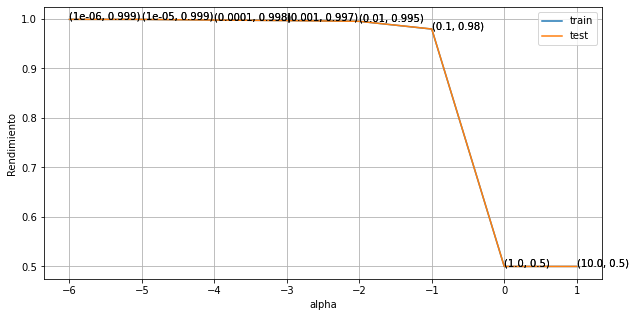

In [23]:
# # Visualizar los resultados para cada valor de alpha

result_visualization(lr_clf, param, 'alpha')

In [20]:
# Analizando los resultados el mejor clasificador es alpha 0.0001 y l2

lr_bst_clf = SGDClassifier(penalty='l2', alpha=0.0001)

+---------+-------+--------------------+--------------------+----------------------+
| Dataset | Model |        AUC         |      F1-score      |   False Alarm Rate   |
+---------+-------+--------------------+--------------------+----------------------+
|  Train  |   LR  | 0.9889939519403423 | 0.9560112395701508 | 0.011006048059657752 |
|   Test  |   LR  | 0.9887693995194254 | 0.9556115039222485 | 0.011230600480574698 |
+---------+-------+--------------------+--------------------+----------------------+


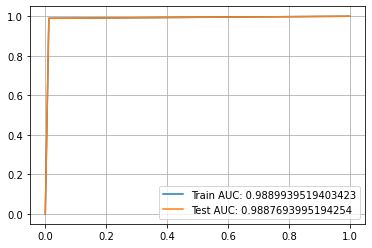

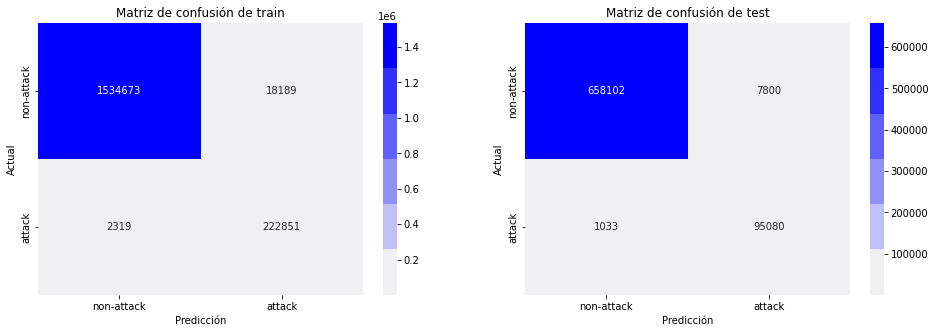

In [21]:
# Obtener el mejor modelo de LR con train y test

x_train_copy = x_train.copy()
y_train_copy = y_train.copy()

lr_clf, lr_auc, lr_f1, lr_far = evaluate_result(lr_bst_clf, x_train_copy, y_train_copy, x_test, y_test, 'LR')

In [23]:
result_dict = {"name":[], "auc":[], "f1":[], "far":[]}

In [24]:
# Almacenar los resultados del LR

result_dict['name'].append("LR")
result_dict['auc'].append(lr_auc)
result_dict['f1'].append(lr_f1)
result_dict['far'].append(lr_far)

In [25]:
pickle.dump(lr_clf, open(file_path+'/lr_clf.pkl', 'wb'))

In [26]:
result_dict

{'name': ['LR'],
 'auc': [0.9887693995194254],
 'f1': [0.9556115039222485],
 'far': [0.011230600480574698]}

##  Linear SVM

In [27]:
# Configurar diferentes valores de alpha y penalty para un clasificador lineal SVM

clf = SGDClassifier(loss='hinge')
param = {'alpha':[10**x for x in range(-5,3)],  # Posibles valores de alpha
         'penalty':['l1', 'l2']}  # Valores de penalty

svm_clf = hyperparam_tuning(clf, param, x_train_csr, y_train, cv=3)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END alpha=1e-05, penalty=l1; FAR: (train=-0.014, test=-0.014) auc: (train=0.999, test=0.999) f1: (train=0.958, test=0.956) total time=   8.2s
[CV 2/3] END alpha=1e-05, penalty=l1; FAR: (train=-0.032, test=-0.033) auc: (train=0.999, test=0.999) f1: (train=0.953, test=0.953) total time=  12.0s
[CV 3/3] END alpha=1e-05, penalty=l1; FAR: (train=-0.020, test=-0.019) auc: (train=0.999, test=0.999) f1: (train=0.957, test=0.958) total time=  10.8s
[CV 1/3] END alpha=1e-05, penalty=l2; FAR: (train=-0.013, test=-0.013) auc: (train=0.999, test=0.999) f1: (train=0.959, test=0.958) total time=   6.8s
[CV 2/3] END alpha=1e-05, penalty=l2; FAR: (train=-0.013, test=-0.014) auc: (train=0.999, test=0.999) f1: (train=0.958, test=0.957) total time=   6.4s
[CV 3/3] END alpha=1e-05, penalty=l2; FAR: (train=-0.016, test=-0.015) auc: (train=0.999, test=0.999) f1: (train=0.958, test=0.959) total time=   7.2s
[CV 1/3] END alpha=0.0001, penalt

Mejor puntuación: 0.9989895071331233
Mejores parámetros: {'alpha': 1e-05, 'penalty': 'l2'}


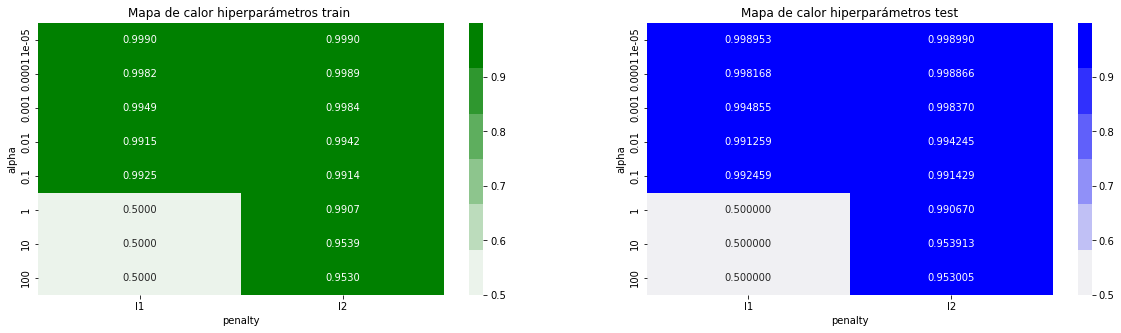

In [28]:
# Visualizar los resultados para los diferentes valores de alpha y penalty

result_visualization(svm_clf, param, 'alpha', 'penalty')

In [29]:
# El mejor clasificador es con penalty l2 y alpha 1e-05

best_svm_clf = svm_clf.best_estimator_

+---------+-------+--------------------+--------------------+----------------------+
| Dataset | Model |        AUC         |      F1-score      |   False Alarm Rate   |
+---------+-------+--------------------+--------------------+----------------------+
|  Train  |  SVM  | 0.9824032927812691 | 0.9588107095656132 | 0.017596707218730988 |
|   Test  |  SVM  | 0.9817929755682907 | 0.9578641891753318 | 0.018207024431709216 |
+---------+-------+--------------------+--------------------+----------------------+


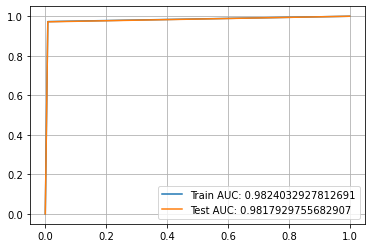

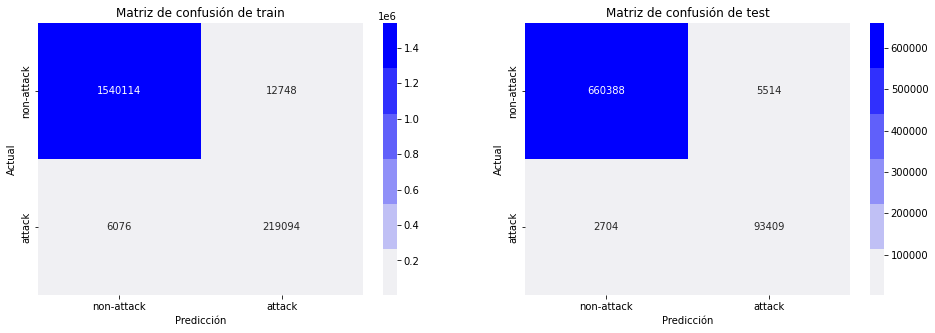

In [30]:
# Obtener el mejor modelo de lineal SVM con train y test

y_train_copy = y_train.copy()
svm_clf, svm_auc, svm_f1, svm_far = evaluate_result(best_svm_clf, x_train_csr, y_train_copy, x_test_csr, y_test, "SVM")

In [31]:
# Almacenar los resultados

result_dict['name'].append("SVM")
result_dict['auc'].append(svm_auc)
result_dict['f1'].append(svm_f1)
result_dict['far'].append(svm_far)

In [32]:
pickle.dump(svm_clf, open(file_path+'/svm_clf.pkl', 'wb'))

In [33]:
pickle.dump(result_dict, open('result_dict.pkl', 'wb'))

## Decision tree

In [34]:
# Configurar diferentes valores de max_depth y min_samples_split para un clasificador DT

clf = DecisionTreeClassifier()
param = {'max_depth':[8, 10, 12, 14], #Posibles valores de max_depth
         'min_samples_split':[2, 4, 6]} #Posibles valores de min_samples_split

dt_clf = hyperparam_tuning(clf, param, x_train_csr, y_train, cv=3)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END max_depth=8, min_samples_split=2; FAR: (train=-0.011, test=-0.011) auc: (train=0.999, test=0.999) f1: (train=0.958, test=0.957) total time=  13.6s
[CV 2/3] END max_depth=8, min_samples_split=2; FAR: (train=-0.015, test=-0.015) auc: (train=0.999, test=0.999) f1: (train=0.962, test=0.961) total time=  14.9s
[CV 3/3] END max_depth=8, min_samples_split=2; FAR: (train=-0.013, test=-0.014) auc: (train=0.999, test=0.999) f1: (train=0.962, test=0.961) total time=  14.3s
[CV 1/3] END max_depth=8, min_samples_split=4; FAR: (train=-0.011, test=-0.011) auc: (train=0.999, test=0.999) f1: (train=0.958, test=0.957) total time=  15.4s
[CV 2/3] END max_depth=8, min_samples_split=4; FAR: (train=-0.015, test=-0.015) auc: (train=0.999, test=0.999) f1: (train=0.962, test=0.961) total time=  18.3s
[CV 3/3] END max_depth=8, min_samples_split=4; FAR: (train=-0.013, test=-0.014) auc: (train=0.999, test=0.999) f1: (train=0.962, test=0.961

Mejor puntuación: 0.9994324522375925
Mejores parámetros: {'max_depth': 10, 'min_samples_split': 6}


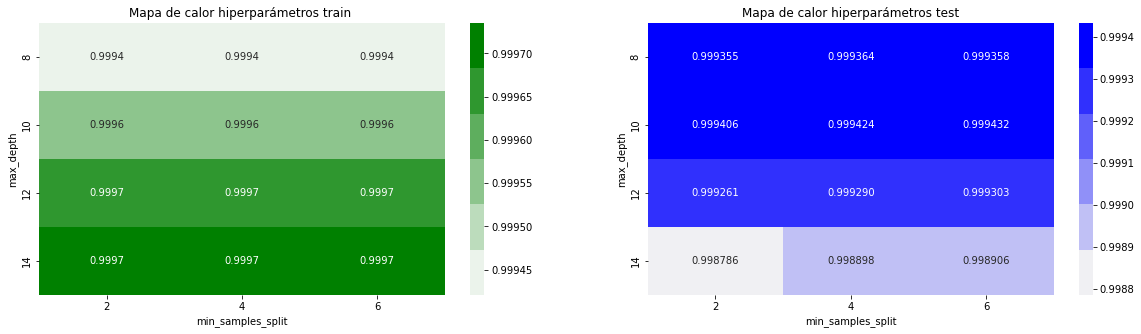

In [35]:
# Visualizar los resultados para los diferentes valores de max_depth y min_samples_split

result_visualization(dt_clf, param, 'max_depth', 'min_samples_split')

In [36]:
# Configurar diferentes valores de min_samples_leaf para el clasificador con max_depth 10 y min_samples_split 6

clf = dt_clf.best_estimator_
param = {'min_samples_leaf':[9, 11, 13]} #Posibles valores de min_samples_leaf

dt_clf = hyperparam_tuning(clf, param, x_train_csr, y_train,cv=3)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END min_samples_leaf=9; FAR: (train=-0.012, test=-0.012) auc: (train=1.000, test=0.999) f1: (train=0.963, test=0.963) total time=  18.9s
[CV 2/3] END min_samples_leaf=9; FAR: (train=-0.029, test=-0.031) auc: (train=1.000, test=0.999) f1: (train=0.964, test=0.962) total time=  16.1s
[CV 3/3] END min_samples_leaf=9; FAR: (train=-0.012, test=-0.013) auc: (train=1.000, test=1.000) f1: (train=0.964, test=0.963) total time=  17.0s
[CV 1/3] END min_samples_leaf=11; FAR: (train=-0.012, test=-0.012) auc: (train=1.000, test=0.999) f1: (train=0.963, test=0.963) total time=  15.3s
[CV 2/3] END min_samples_leaf=11; FAR: (train=-0.029, test=-0.031) auc: (train=1.000, test=1.000) f1: (train=0.964, test=0.962) total time=  16.7s
[CV 3/3] END min_samples_leaf=11; FAR: (train=-0.012, test=-0.013) auc: (train=1.000, test=1.000) f1: (train=0.964, test=0.963) total time=  16.4s
[CV 1/3] END min_samples_leaf=13; FAR: (train=-0.012, test=-0.

Mejor puntuación: 0.9994970021107648
Mejores parámetros: {'min_samples_leaf': 11}


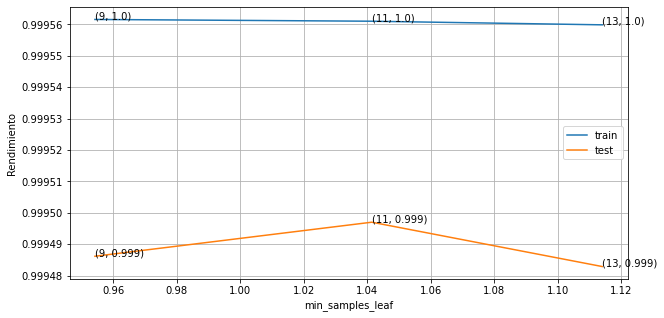

In [37]:
# Visualizar los resultados para los diferentes valores de min_samples_leaf

result_visualization(dt_clf, param, 'min_samples_leaf')

In [39]:
# El mejor clasificador es con max_depth 10, min_samples_split 4 y min_samples_leaf 11

dt_param = {'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf':11}

dt_best_clf = DecisionTreeClassifier(**dt_param)

+---------+-------+--------------------+--------------------+----------------------+
| Dataset | Model |        AUC         |      F1-score      |   False Alarm Rate   |
+---------+-------+--------------------+--------------------+----------------------+
|  Train  |   DT  | 0.9867231988527481 | 0.9640486448164912 | 0.013276801147251889 |
|   Test  |   DT  | 0.9863174554794822 | 0.9633172865626182 | 0.013682544520517736 |
+---------+-------+--------------------+--------------------+----------------------+


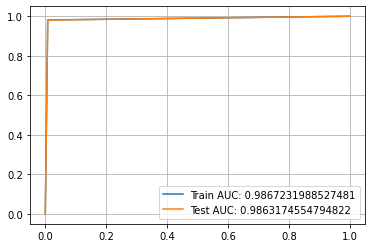

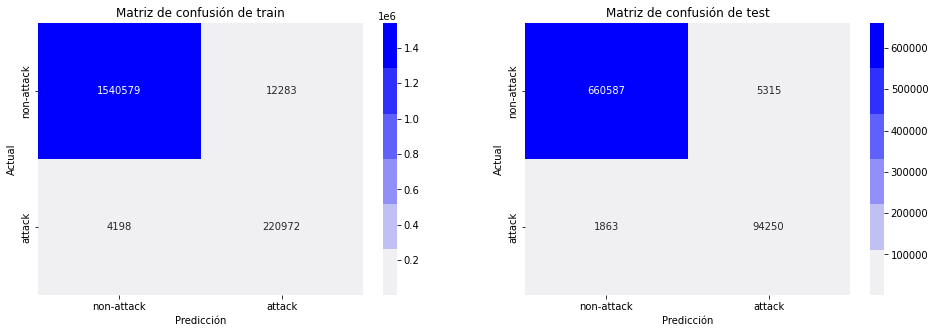

In [40]:
# Obtener el mejor modelo de DT con train y test

y_train_copy = y_train.copy()
dt_clf, dt_auc, dt_f1, dt_far = evaluate_result(dt_best_clf, x_train_csr, y_train_copy, x_test_csr, y_test, 'DT')

In [41]:
pickle.dump(dt_clf, open(file_path+'/dt_clf.pkl', 'wb'))

In [42]:
result_dict = pickle.load(open('./result_dict.pkl', 'rb'))

In [43]:
# Almacenar los resultados del DT

result_dict['name'].append("DT")
result_dict['auc'].append(dt_auc)
result_dict['f1'].append(dt_f1)
result_dict['far'].append(dt_far)

In [44]:
result_dict

{'name': ['LR', 'SVM', 'DT'],
 'auc': [0.9887693995194254, 0.9817929755682907, 0.9863174554794822],
 'f1': [0.9556115039222485, 0.9578641891753318, 0.9633172865626182],
 'far': [0.011230600480574698, 0.018207024431709216, 0.013682544520517736]}

## Cross Validation function

In [20]:
#Dvidir los datos para train y validación cruzada 

x_train_new_csr, x_cv_csr, y_train, y_cv = train_test_split(x_train_csr, y_train, test_size=0.2, random_state=42)

In [21]:
x_train_new_csr.shape, y_train.shape, x_cv_csr.shape, y_cv.shape, x_test_csr.shape, y_test.shape

((1422425, 196),
 (1422425,),
 (355607, 196),
 (355607,),
 (762015, 196),
 (762015,))

In [22]:
#Función para realizar la validación cruzada con varios valores de un hiperparámetro a un clasificador

def cross_validation(clf_name, param, param_tune,
                     x_train=x_train_new_csr, y_train=y_train, x_cv=x_cv_csr, y_cv=y_cv):
    #Inicialización
    
    train_auc_list = []
    cv_auc_list = []
    hyper_param = param_tune
    values = param.pop(hyper_param)
    classifier = clf_name

    # Iteraciones con los diferentes valores del hiperparámetro
    
    for i in tqdm(values):
        
        #Entrenar el clasficador
    
        clf = classifier(**{hyper_param:i}, **param, n_jobs=-1)
        clf.fit(x_train, y_train)

        # Realizar predicciones de probabilidad
        
        y_train_pred = clf.predict_proba(x_train)[:,1]
        y_cv_pred = clf.predict_proba(x_cv)[:,1]

        # Obtener los resultados
        
        train_auc_list.append(roc_auc_score(y_train, y_train_pred))
        cv_auc_list.append(roc_auc_score(y_cv, y_cv_pred))

        print("Para unos valores {}: {}, train auc: {} and test auc {}".format(hyper_param, i, train_auc_list[-1], cv_auc_list[-1]))
    
    plt.figure(figsize=(10,5))
    plt.plot(values, train_auc_list, label="train")
    plt.plot(values, cv_auc_list, label="cv")

    for i, txt in enumerate(train_auc_list):
        plt.annotate((values[i], np.round(txt, 3)), (values[i], train_auc_list[i]))
    for i, txt in enumerate(cv_auc_list):
        plt.annotate((values[i], np.round(txt, 3)), (values[i], cv_auc_list[i]))
    
    plt.xlabel(hyper_param)
    plt.ylabel('Puntuación auc')
    plt.grid()
    plt.legend()
    plt.show()

    # Búsqueda del clasificador con mejores resultados
    
    best_param = np.argmax(cv_auc_list)
    clf = classifier(**{hyper_param:values[best_param]}, **param)

    return clf, hyper_param, values[best_param]

## Random Forest

In [23]:
CLF_NAME = RandomForestClassifier

 25%|███████████                                 | 1/4 [04:33<13:40, 273.36s/it]

Para unos valores n_estimators: 100, train auc: 0.9999999382181327 and test auc 0.9997597456008286


 50%|██████████████████████                      | 2/4 [11:31<11:57, 358.72s/it]

Para unos valores n_estimators: 200, train auc: 0.9999999417750809 and test auc 0.9997643168655606


 75%|█████████████████████████████████           | 3/4 [23:08<08:33, 513.11s/it]

Para unos valores n_estimators: 300, train auc: 0.9999999312651033 and test auc 0.9997770367557681


100%|████████████████████████████████████████████| 4/4 [37:04<00:00, 556.03s/it]

Para unos valores n_estimators: 400, train auc: 0.9999999392056773 and test auc 0.9997655731982428


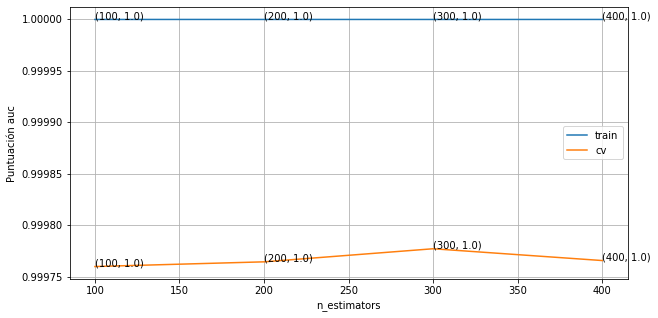

In [24]:
# Configurar diferentes valores de n_estimators para un clasificador RF

param = {'n_estimators':[100, 200, 300, 400]} #Posibles valores de n_estimators
rf_clf, param1, val1 = cross_validation(CLF_NAME, param, 'n_estimators')

 33%|████████████████████████████████████████████████████████████████████████▋                                                                                                                                                 | 1/3 [03:27<06:54, 207.49s/it]

Para unos valores max_depth: 20, train auc: 0.9999206490583075 and test auc 0.9997623923050452


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 2/3 [07:24<03:44, 224.96s/it]

Para unos valores max_depth: 22, train auc: 0.9999622113393823 and test auc 0.9997731564579226


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [11:25<00:00, 228.51s/it]

Para unos valores max_depth: 24, train auc: 0.9999815743065589 and test auc 0.9997690197736783


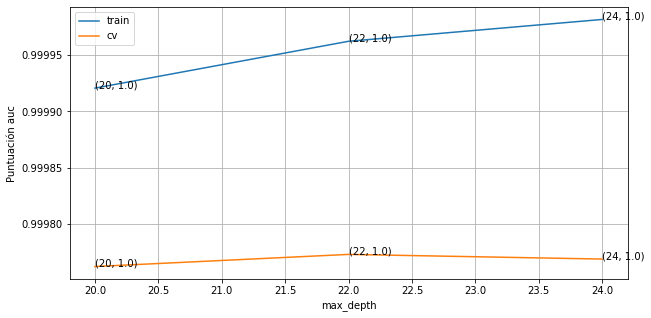

In [47]:
# Configurar diferentes valores de max_depth para un clasificador RF

param = {'max_depth':[20, 22, 24]} #Posibles valores de max_depth
rt_clf, param2, val2 = cross_validation(CLF_NAME, param, 'max_depth')

 33%|████████████████████████████████████████████████████████████████████████▋                                                                                                                                                 | 1/3 [04:05<08:10, 245.07s/it]

Para unos valores min_samples_split: 2, train auc: 0.9999815769720357 and test auc 0.9997725109691424


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 2/3 [07:20<03:36, 216.02s/it]

Para unos valores min_samples_split: 4, train auc: 0.9999735540205746 and test auc 0.9997650526669946


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [10:59<00:00, 219.98s/it]

Para unos valores min_samples_split: 6, train auc: 0.9999613186794298 and test auc 0.9997782956626831


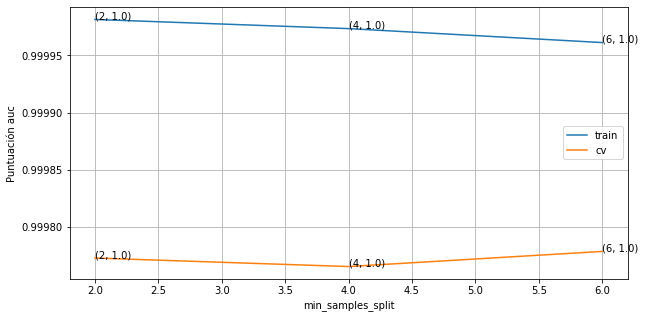

In [48]:
# Configurar diferentes valores de min_samples_split para un clasificador RF

param = {'min_samples_split':[2, 4, 6], 'max_depth':24} #Posibles valores de min_samples_split
rt_clf = cross_validation(CLF_NAME, param, 'min_samples_split')

 50%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                             | 1/2 [03:23<03:23, 203.20s/it]

Para unos valores criterion: gini, train auc: 0.9999806377299137 and test auc 0.9997705018164894


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [07:16<00:00, 218.11s/it]

Para unos valores criterion: entropy, train auc: 0.9999672411546475 and test auc 0.9997732264984964


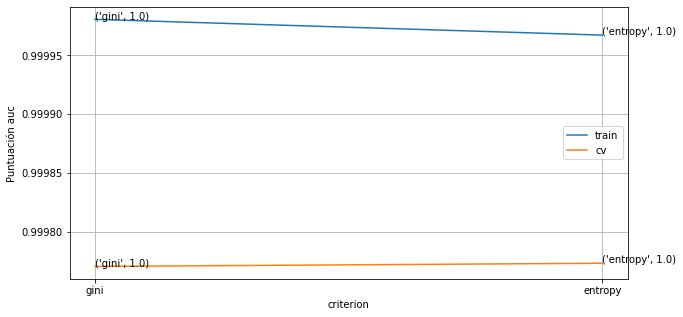

In [49]:
# Configurar diferentes valores de criterion para un clasificador RF

param = {'criterion':['gini', 'entropy'], 'min_samples_split':2, 'max_depth':24} #Posibles valores de criterion
rt_clf, _, _ = cross_validation(CLF_NAME, param, 'criterion')

In [49]:
# El mejor clasificador a partir de los resultados obtenidos 

rf_bst_clf = RandomForestClassifier(criterion='gini', max_depth=24, min_samples_split=2, n_estimators=300, n_jobs=-1)

+---------+-------+--------------------+--------------------+---------------------+
| Dataset | Model |        AUC         |      F1-score      |   False Alarm Rate  |
+---------+-------+--------------------+--------------------+---------------------+
|  Train  |   RF  | 0.9955252248752383 |  0.99419713057152  | 0.00447477512476171 |
|   Test  |   RF  | 0.9856129417927407 | 0.9769550631557529 | 0.01438705820725936 |
+---------+-------+--------------------+--------------------+---------------------+


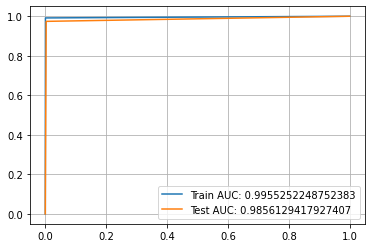

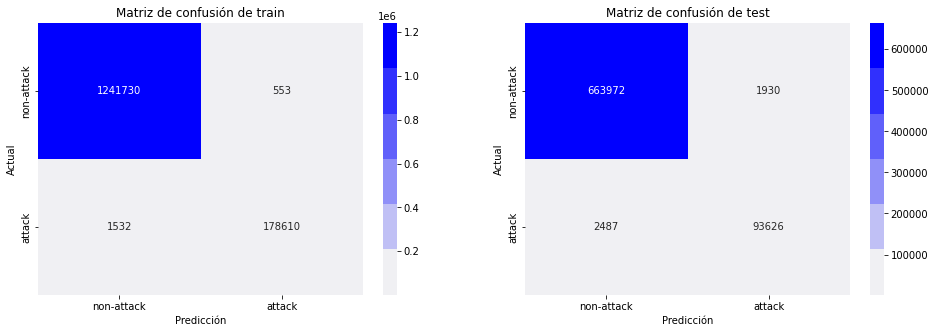

In [50]:
# Obtener los resultados con el clasificador

rf_clf, rf_auc, rf_f1, rf_far = evaluate_result(rf_bst_clf, x_train_new_csr, y_train, x_test_csr, y_test, "RF")

In [51]:
pickle.dump(rf_clf, open(file_path+'/rf_best_clf.pkl', 'wb'))

In [52]:
result_dict = pickle.load(open('result_dict.pkl', 'rb'))

In [53]:
# Almacenar los resultados del clasificador RF

result_dict['name'].append("RF")
result_dict['auc'].append(rf_auc)
result_dict['f1'].append(rf_f1)
result_dict['far'].append(rf_far)

In [54]:
pd.DataFrame(result_dict)

,name,auc,f1,far
0,LR,0.988769,0.955612,0.011231
1,SVM,0.981793,0.957864,0.018207
2,RF,0.985613,0.976955,0.014387


In [55]:
pickle.dump(result_dict, open('result_dict.pkl', 'wb'))

## GBDT

 33%|█████████████████████████████████████████████████████████████████████████                                                                                                                                                  | 1/3 [00:09<00:19,  9.57s/it]

Para unos valores learning_rate: 0.001, train auc: 0.9995138738457454 and test auc 0.9995162581444998


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                         | 2/3 [00:17<00:08,  8.83s/it]

Para unos valores learning_rate: 0.01, train auc: 0.9995991492109337 and test auc 0.9995906270756474


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:26<00:00,  8.79s/it]

Para unos valores learning_rate: 0.1, train auc: 0.9997146778709394 and test auc 0.9996971473831895


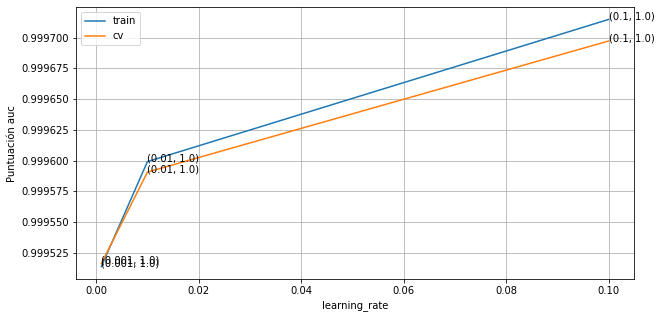

In [56]:
# Configurar diferentes valores de learning_rate para un clasificador GBDT

CLF_NAME = xgb.XGBClassifier
param = {'learning_rate':[0.001, 0.01, 0.1]} #Posibles valores de learning_rate
xgb_clf = cross_validation(CLF_NAME, param, 'learning_rate')

 33%|█████████████████████████████████████████████████████████████████████████                                                                                                                                                  | 1/3 [00:09<00:18,  9.16s/it]

Para unos valores max_depth: 4, train auc: 0.9997611395778683 and test auc 0.9997352311139563


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                         | 2/3 [00:24<00:12, 12.89s/it]

Para unos valores max_depth: 8, train auc: 0.9999320983384683 and test auc 0.999810836498991


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:46<00:00, 15.36s/it]

Para unos valores max_depth: 12, train auc: 0.9999934216610624 and test auc 0.9998222619793289


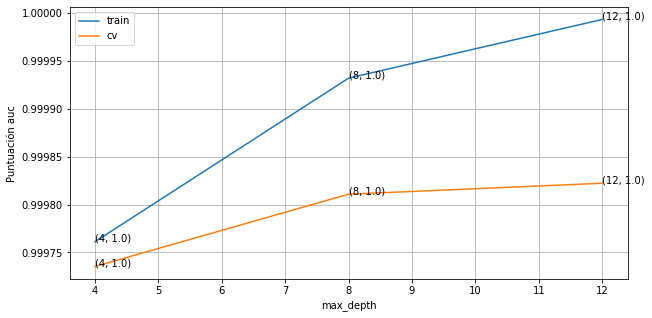

In [57]:
# Configurar diferentes valores de max_depth para un clasificador GBDT

param = {'max_depth':[4, 8, 12]} #Posibles valores de max_depth
xgb_clf, _, _ = cross_validation(CLF_NAME, param, 'max_depth')

In [73]:
train_sample = np.random.randint(0, x_train.shape[0], size=700000)

In [74]:
y_train.shape

(1422425,)

In [75]:
x_train.shape

(1778032, 196)

In [76]:
train_sample

array([1375458, 1075997,  386879, ..., 1069634,  638941,  241402])

 25%|██████████████████████████████████████████████████████▊                                                                                                                                                                    | 1/4 [00:11<00:34, 11.34s/it]

For subsample: 0.1, train auc: 0.9997481594954364 and test auc 0.997749199215429


 50%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                             | 2/4 [00:26<00:27, 13.64s/it]

For subsample: 0.4, train auc: 0.9998817195209194 and test auc 0.9905154242653823


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 3/4 [00:40<00:13, 13.93s/it]

For subsample: 0.7, train auc: 0.9998964635227892 and test auc 0.993910874408196


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:54<00:00, 13.52s/it]

For subsample: 1, train auc: 0.9998632967282427 and test auc 0.9923939314766839


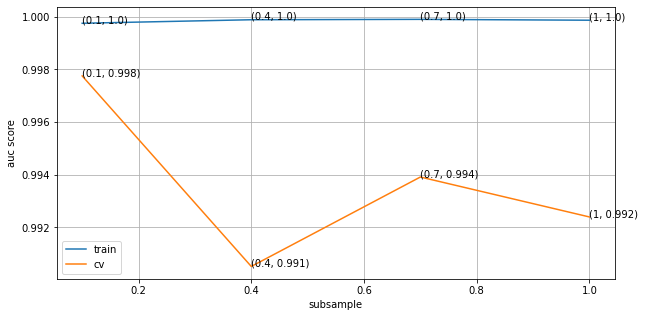

In [75]:
# Configurar diferentes valores de subsample para un clasificador GBDT

param = {'subsample':[0.1, 0.4, 0.7, 1]}
xgb_xlf,_,_ = cross_validation(CLF_NAME, param, 'subsample', x_train=x_train.iloc[train_sample], y_train=y_train.iloc[train_sample])

 33%|█████████████████████████████████████████████████████████████████████████                                                                                                                                                  | 1/3 [00:22<00:45, 22.86s/it]

For n_estimators: 200, train auc: 0.9999559719175543 and test auc 0.9941049445034632


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                         | 2/3 [00:54<00:28, 28.09s/it]

For n_estimators: 300, train auc: 0.9999799910175884 and test auc 0.9950388270446695


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:36<00:00, 32.15s/it]

For n_estimators: 400, train auc: 0.9999885805053477 and test auc 0.9956984097830514


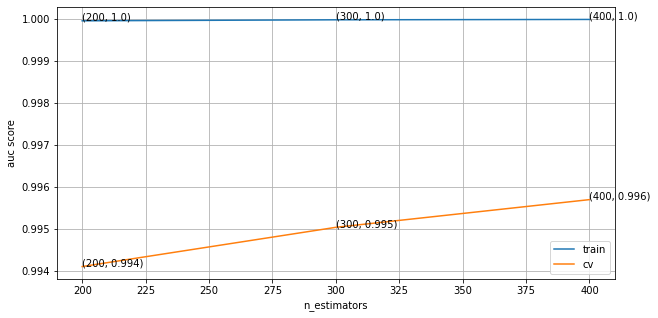

In [76]:
# Configurar diferentes valores de n_estimators para un clasificador GBDT

param = {'n_estimators':[200, 300, 400]}
xgb_clf,_,_ = cross_validation(CLF_NAME, param, 'n_estimators', x_train=x_train.iloc[train_sample], y_train=y_train.iloc[train_sample])

In [78]:
# El mejor clasificador a partir de los resultados obtenidos 

best_params = {'n_estimators':400,
               'max_depth':12,
               'learning_rate':0.1,
               'colsample_bylevel':0.5,
               'subsample':0.1,
               'n_jobs':-1}

xgb_bst_clf = xgb.XGBClassifier(**best_params)

+---------+-------+--------------------+--------------------+----------------------+
| Dataset | Model |        AUC         |      F1-score      |   False Alarm Rate   |
+---------+-------+--------------------+--------------------+----------------------+
|  Train  |  GBDT | 0.9940880941332393 | 0.9900253254543031 | 0.005911905866760658 |
|   Test  |  GBDT | 0.9854335319711998 | 0.974515301743197  | 0.014566468028800215 |
+---------+-------+--------------------+--------------------+----------------------+


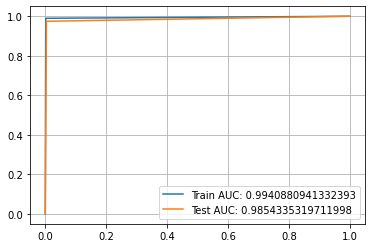

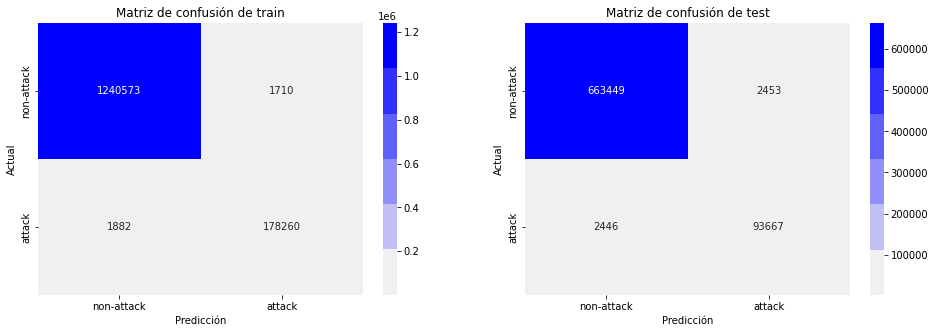

In [80]:
xgb_clf, xgb_auc, xgb_f1, xgb_far = evaluate_result(xgb_bst_clf, x_train_new_csr, y_train, x_test_csr, y_test, "GBDT")

In [81]:
pickle.dump(xgb_clf, open(file_path+'/xgb_bst_clf.pkl', 'wb'))

In [82]:
result_dict = pickle.load(open('result_dict.pkl', 'rb'))

In [83]:
# Almacenar los resultados del clasificador XGB

result_dict['name'].append("XGB")
result_dict['auc'].append(xgb_auc)
result_dict['f1'].append(xgb_f1)
result_dict['far'].append(xgb_far)

In [84]:
pd.DataFrame(result_dict)

,name,auc,f1,far
0,LR,0.988769,0.955612,0.011231
1,SVM,0.981793,0.957864,0.018207
2,RF,0.985613,0.976955,0.014387
3,XGB,0.985434,0.974515,0.014566


In [85]:
pickle.dump(result_dict, open('result_dict.pkl', 'wb'))

## Modelos con las mejores características 

In [23]:
RF_clf = pickle.load(open(file_path+'/rf_best_clf.pkl', 'rb'))

In [24]:
# Todas las características con importancia

np.count_nonzero(RF_clf.feature_importances_)

196

In [25]:
# Getting the indices of the features sorted in descending order

indices = np.argsort(-1 * abs(RF_clf.feature_importances_))[:55]

In [26]:
saved_dict = pickle.load(open(file_path+'/saved_dict.pkl', 'rb'))

In [27]:
saved_dict['imp_indices'] = indices

In [28]:
pickle.dump(saved_dict, open(file_path+'/saved_dict.pkl', 'wb'))

In [29]:
x_train_new_csr[:,indices].shape

(1422425, 55)

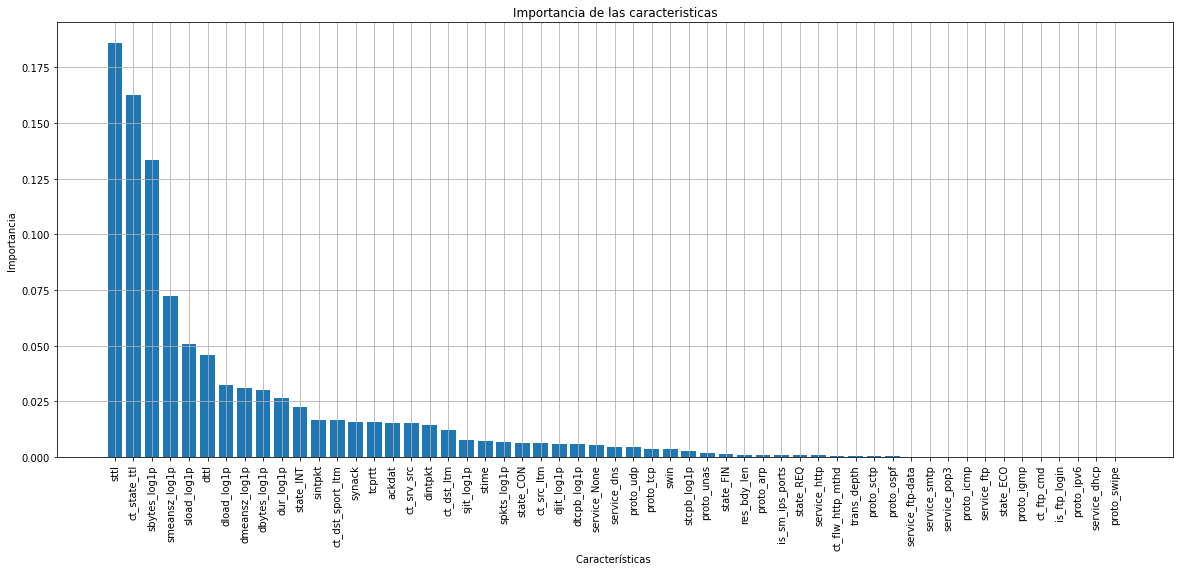

In [30]:
plt.figure(figsize=(20,8))
plt.bar(x_train.columns[indices], abs(RF_clf.feature_importances_[indices]))
plt.xticks(rotation=90)
plt.xlabel("Características ")
plt.ylabel("Importancia")
plt.title("Importancia de las caracteristicas")
plt.grid()
plt.show()

## Random Forest con características importantes

In [94]:
# Configurar clasificador RF

rf_clf_imp = RandomForestClassifier(criterion='gini', max_depth=22, min_samples_split=6, n_estimators=400, n_jobs=-1)

+---------+-------+--------------------+--------------------+----------------------+
| Dataset | Model |        AUC         |      F1-score      |   False Alarm Rate   |
+---------+-------+--------------------+--------------------+----------------------+
|  Train  | RF_FI | 0.994012508866961  | 0.9920349348869852 | 0.005987491133038903 |
|   Test  | RF_FI | 0.9859606339586756 | 0.9776666910176266 | 0.014039366041324422 |
+---------+-------+--------------------+--------------------+----------------------+


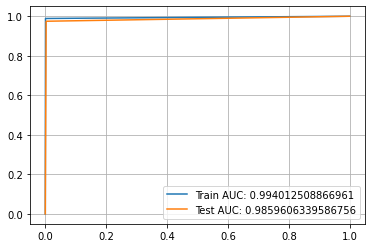

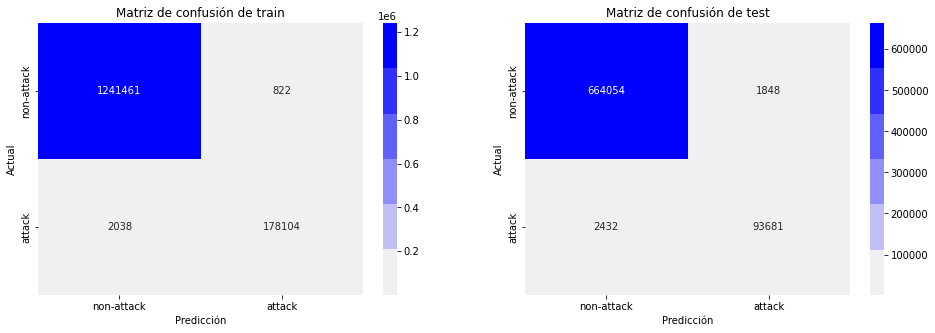

In [95]:
# Obtener los resultados con el clasificador pasando solo las características importantes

rf_clf_imp, rf_fi_auc, rf_fi_f1, rf_fi_far = evaluate_result(rf_clf_imp, x_train_new_csr[:,indices], y_train, x_test_csr[:,indices], y_test, 'RF_FI')

In [96]:
pickle.dump(rf_clf_imp, open(file_path+'/rf_clf_imp.pkl', 'wb'))

In [97]:
result_dict = pickle.load(open('result_dict.pkl', 'rb'))

In [98]:
#Almacenar los resultados

for i,j in zip(result_dict.keys(), ["RF_FI", rf_fi_auc, rf_fi_f1, rf_fi_far]):
    result_dict[i].append(j)

In [99]:
pd.DataFrame(result_dict)

,name,auc,f1,far
0,LR,0.988769,0.955612,0.011231
1,SVM,0.981793,0.957864,0.018207
2,RF,0.985613,0.976955,0.014387
3,XGB,0.985434,0.974515,0.014566
4,RF_FI,0.985961,0.977667,0.014039


## Decision tree con características importantes

In [31]:
# Configurar clasificador DT

dt_clf_imp = DecisionTreeClassifier(max_depth=10, min_samples_split=6, min_samples_leaf=9)

+---------+-------+--------------------+--------------------+----------------------+
| Dataset | Model |        AUC         |      F1-score      |   False Alarm Rate   |
+---------+-------+--------------------+--------------------+----------------------+
|  Train  | DT_FI | 0.9869836426157372 | 0.9634177218636081 | 0.013016357384262791 |
|   Test  | DT_FI | 0.9865154007450027 | 0.9624558056007633 | 0.01348459925499735  |
+---------+-------+--------------------+--------------------+----------------------+


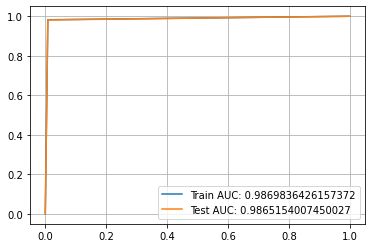

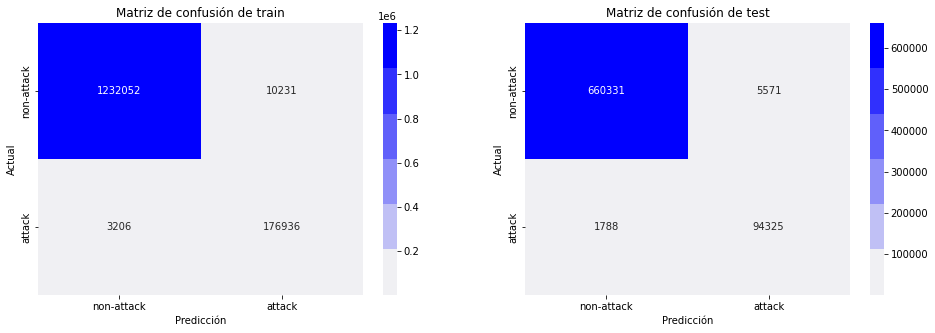

In [32]:
# Obtener los resultados con el clasificador pasando solo las características importantes

dt_clf_imp, dt_fi_auc, dt_fi_f1, dt_fi_far = evaluate_result(dt_clf_imp, x_train_new_csr[:,indices], y_train, x_test_csr[:,indices], y_test, 'DT_FI')

In [108]:
pickle.dump(dt_clf_imp, open(file_path+'/dt_clf_imp.pkl', 'wb'))

In [109]:
#Almacenar los resultados

for i,j in zip(result_dict.keys(), ["DT_FI", dt_fi_auc, dt_fi_f1, dt_fi_far]):
    result_dict[i].append(j)

In [110]:
pd.DataFrame(result_dict)

,name,auc,f1,far
0,LR,0.975688,0.953033,0.024312
1,SVM,0.991793,0.953227,0.008207
2,DT,0.976055,0.968994,0.023945
3,RF,0.985477,0.976750,0.014523
4,RF_FI,0.985463,0.976598,0.014537
5,DT_FI,0.976011,0.969143,0.023989


In [111]:
pickle.dump(result_dict, open(file_path+'/final_result_dict.pkl', 'wb'))